<a href="https://colab.research.google.com/github/EyeofaThous/AAE590/blob/main/HW3BLR%26GPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern

# Load the Excel file
file_path = "Data590.xlsx"
xls = pd.ExcelFile(file_path)

Bayesian For Holes

Processing Load Case: 1mm Disp


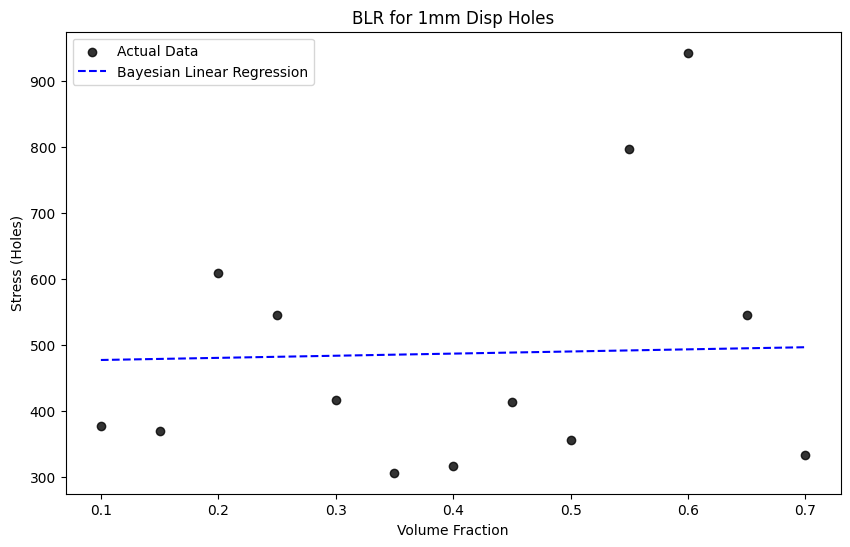

Processing Load Case: 5mm Disp


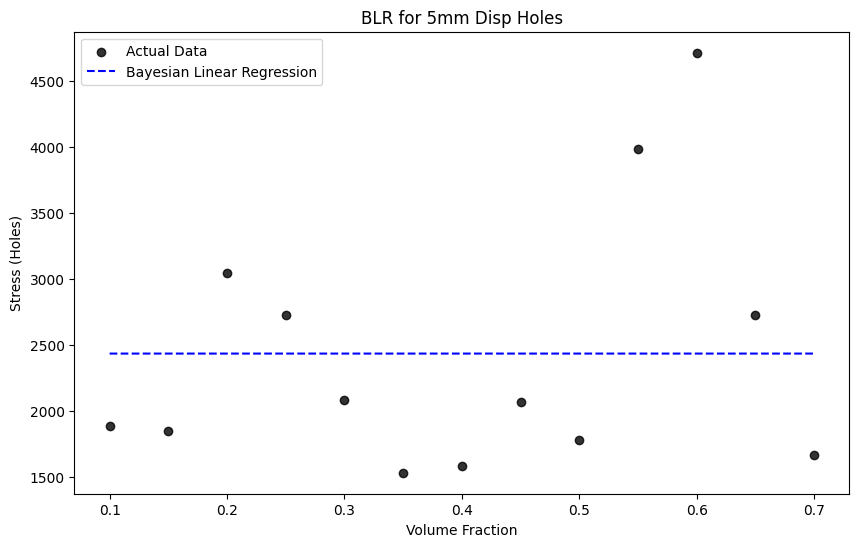

Processing Load Case: 100N Load


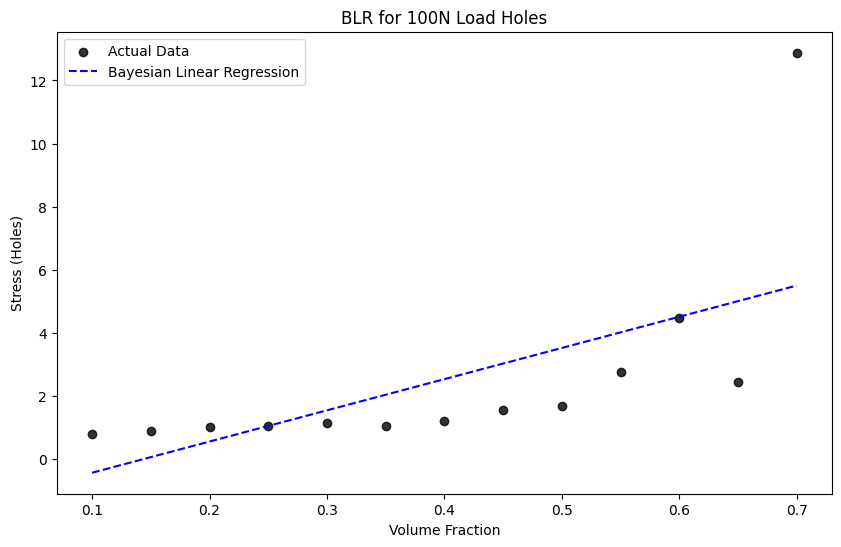

Processing Load Case: 500N Load


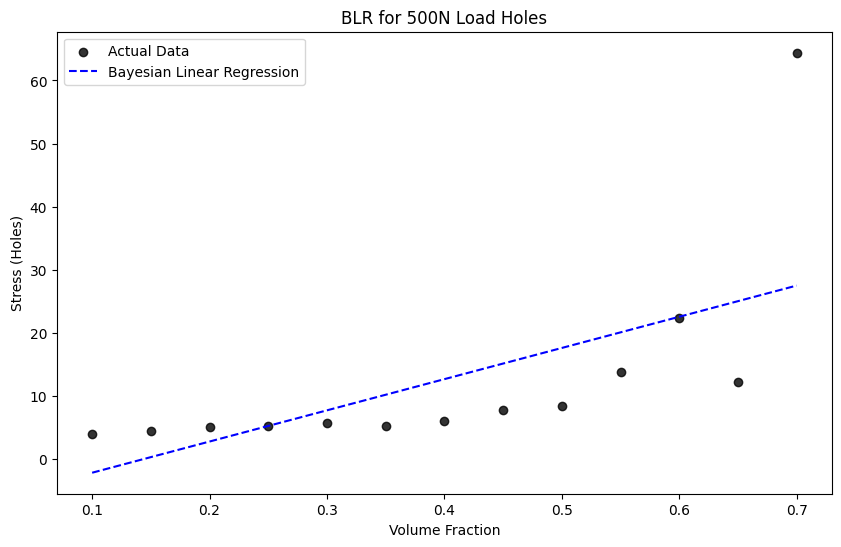

In [34]:
# Loop through each sheet (load case)
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Holes"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Holes"].values  # Selecting Holes as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # BLR
    blr = BayesianRidge()
    blr.fit(X_scaled, y)
    y_pred_blr = blr.predict(X_scaled)

    plt.figure(figsize=(10, 6))

    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Bayesian Linear Regression Line
    plt.plot(X, y_pred_blr, color='blue', label="Bayesian Linear Regression", linestyle='dashed')



    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Holes)")
    plt.title(f"BLR for {sheet_name} Holes")
    plt.legend()
    plt.show()

In [37]:
X_scaled

array([[-1.60356745],
       [-1.33630621],
       [-1.06904497],
       [-0.80178373],
       [-0.53452248],
       [-0.26726124],
       [ 0.        ],
       [ 0.26726124],
       [ 0.53452248],
       [ 0.80178373],
       [ 1.06904497],
       [ 1.33630621],
       [ 1.60356745]])

Gaussian For Holes

Processing Load Case: 1mm Disp


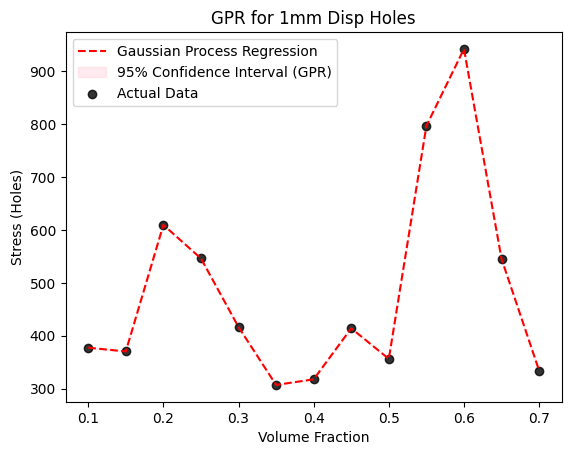

Optimized Kernel for GPR (1mm Disp): 439**2 * RBF(length_scale=0.332)
Processing Load Case: 5mm Disp


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


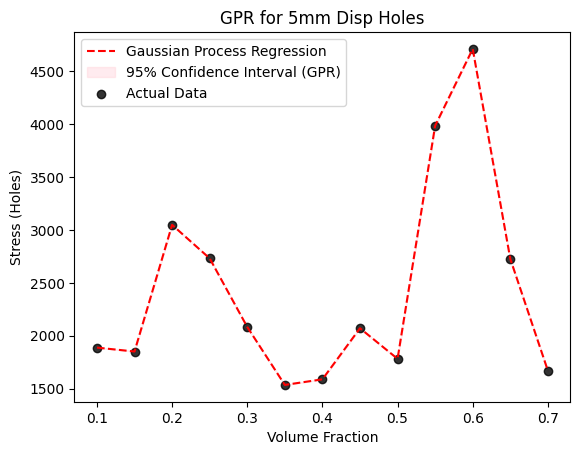

Optimized Kernel for GPR (5mm Disp): 2.61e+03**2 * RBF(length_scale=0.0102)
Processing Load Case: 100N Load


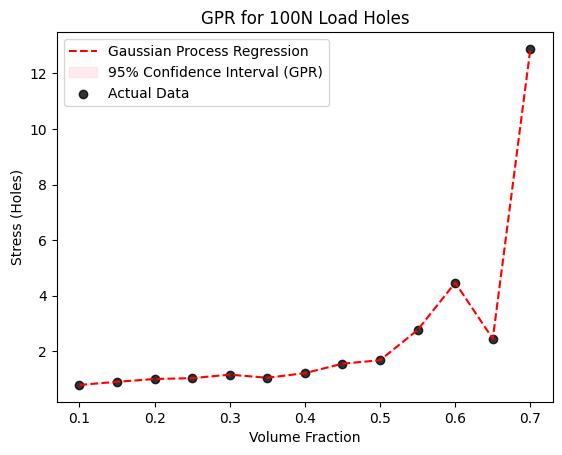

Optimized Kernel for GPR (100N Load): 4.29**2 * RBF(length_scale=0.219)
Processing Load Case: 500N Load


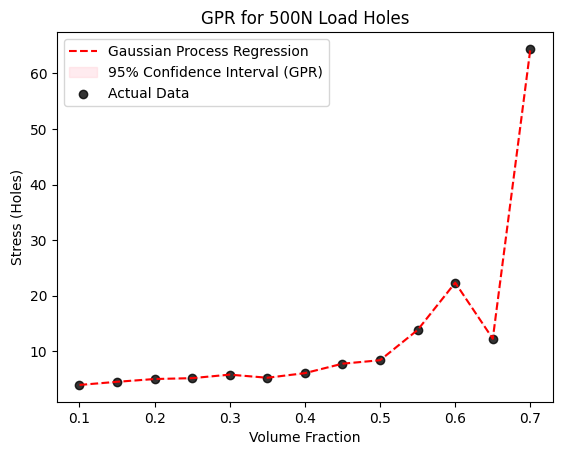

Optimized Kernel for GPR (500N Load): 21.4**2 * RBF(length_scale=0.219)


In [30]:
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Holes"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Holes"].values  # Selecting Holes as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # GPR
    kernel = C(1.0, (1e-3, 1e7)) * RBF(1.0, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X_scaled, y)
    y_pred_gpr, y_std = gpr.predict(X_scaled, return_std=True)  # Get mean and std deviation
    # Gaussian Process Mean Prediction
    plt.plot(X, y_pred_gpr, color='red', label="Gaussian Process Regression", linestyle='dashed')
     # Uncertainty Bounds (GPR)
    plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * y_std, y_pred_gpr + 1.96 * y_std,
                     color='pink', alpha=0.3, label="95% Confidence Interval (GPR)")
    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Holes)")
    plt.title(f"GPR for {sheet_name} Holes")
    plt.legend()
    plt.show()
    # Print Kernel after Optimization
    print(f"Optimized Kernel for GPR ({sheet_name}):", gpr.kernel_)

Bayessian for Mat A

Processing Load Case: 1mm Disp


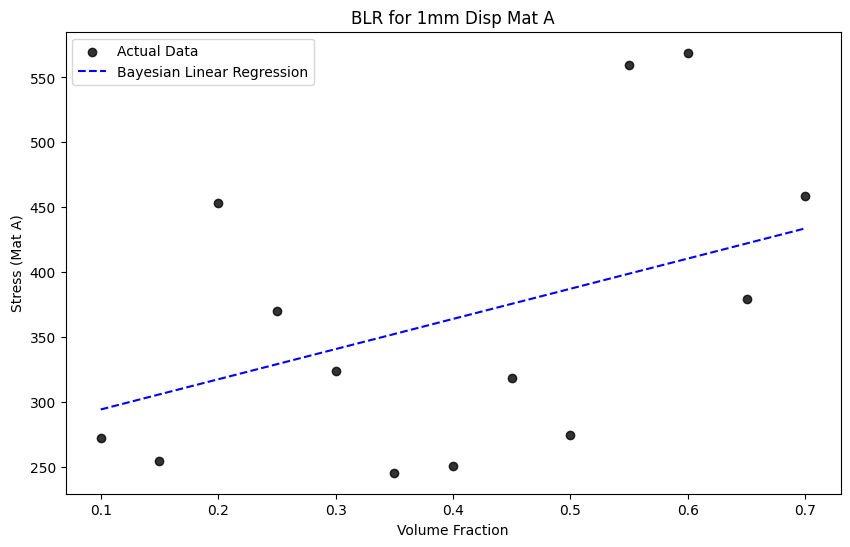

Processing Load Case: 5mm Disp


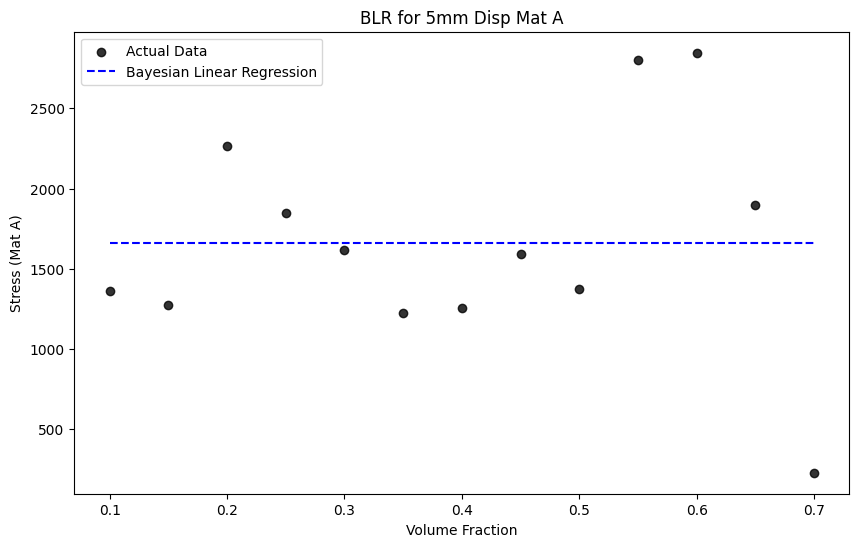

Processing Load Case: 100N Load


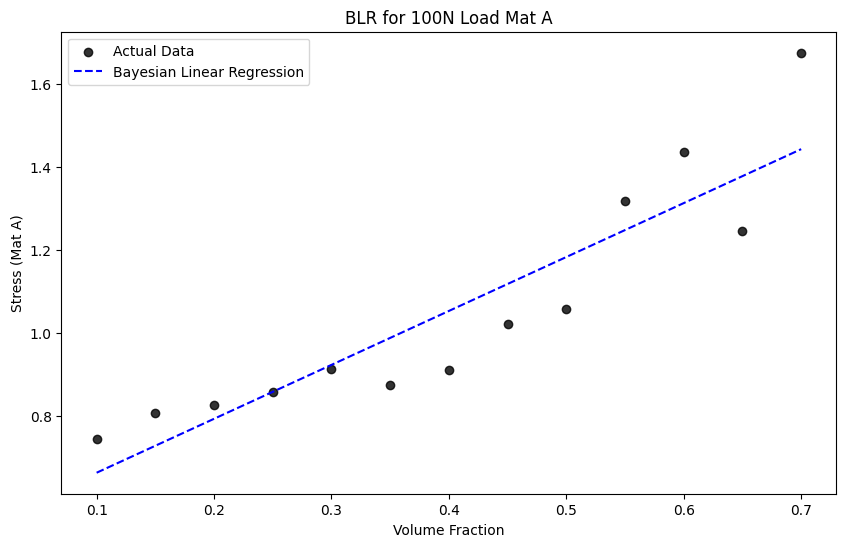

Processing Load Case: 500N Load


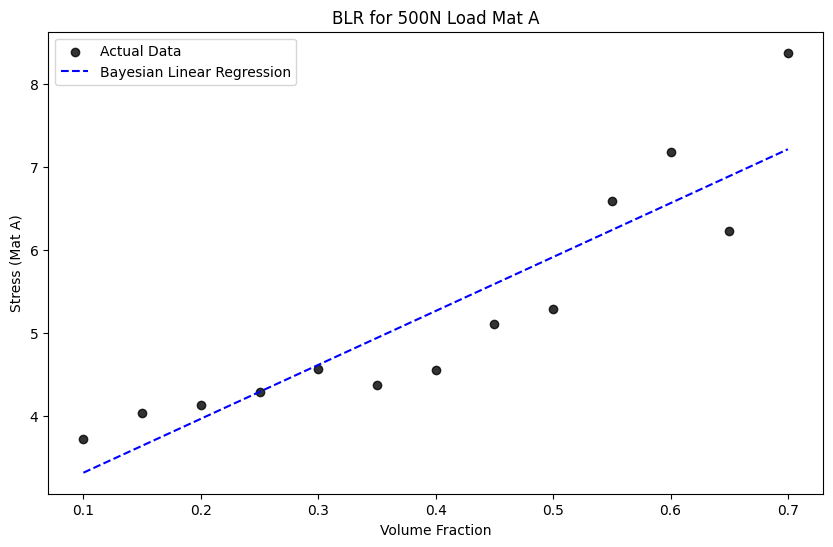

In [13]:
# Loop through each sheet (load case)
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat A"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat A"].values  # Selecting Mat A as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # BLR
    blr = BayesianRidge()
    blr.fit(X_scaled, y)
    y_pred_blr = blr.predict(X_scaled)

    plt.figure(figsize=(10, 6))

    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Bayesian Linear Regression Line
    plt.plot(X, y_pred_blr, color='blue', label="Bayesian Linear Regression", linestyle='dashed')



    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat A)")
    plt.title(f"BLR for {sheet_name} Mat A")
    plt.legend()
    plt.show()

Gaussian For Mat A

Processing Load Case: 1mm Disp


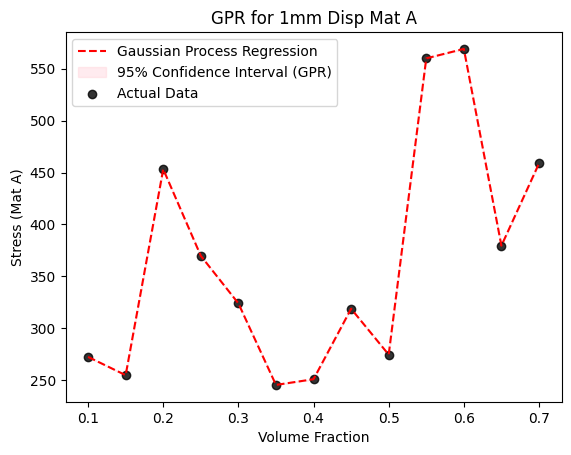

Optimized Kernel for GPR (1mm Disp): 334**2 * RBF(length_scale=0.319)
Processing Load Case: 5mm Disp


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


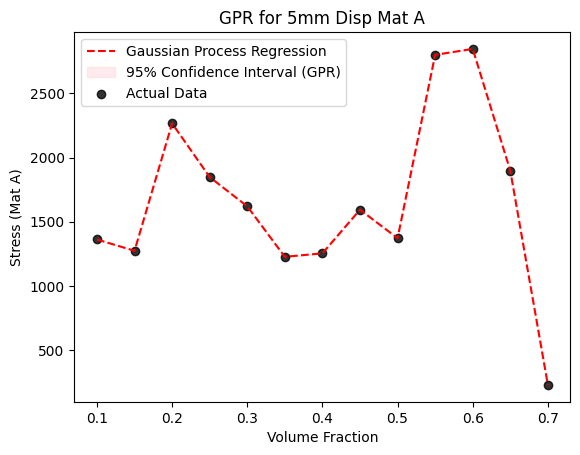

Optimized Kernel for GPR (5mm Disp): 1.51e+03**2 * RBF(length_scale=0.298)
Processing Load Case: 100N Load


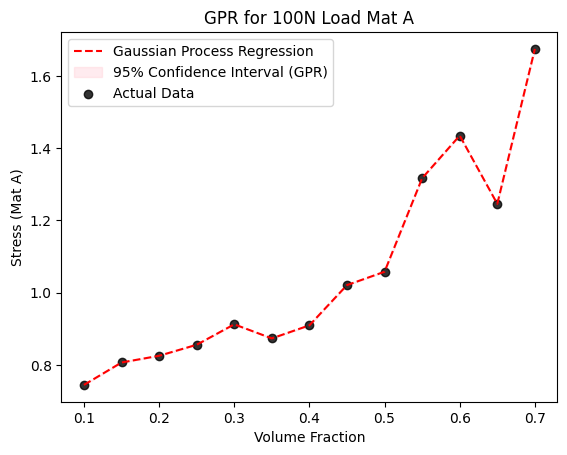

Optimized Kernel for GPR (100N Load): 1.11**2 * RBF(length_scale=0.454)
Processing Load Case: 500N Load


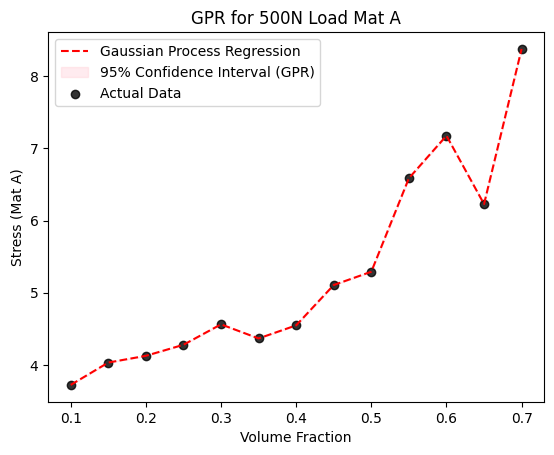

Optimized Kernel for GPR (500N Load): 5.53**2 * RBF(length_scale=0.454)


In [29]:
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat A"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat A"].values  # Selecting Mat A as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # GPR
    kernel = C(1.0, (1e-3, 1e7)) * RBF(1.0, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X_scaled, y)
    y_pred_gpr, y_std = gpr.predict(X_scaled, return_std=True)  # Get mean and std deviation
    # Gaussian Process Mean Prediction
    plt.plot(X, y_pred_gpr, color='red', label="Gaussian Process Regression", linestyle='dashed')
     # Uncertainty Bounds (GPR)
    plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * y_std, y_pred_gpr + 1.96 * y_std,
                     color='pink', alpha=0.3, label="95% Confidence Interval (GPR)")
    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat A)")
    plt.title(f"GPR for {sheet_name} Mat A")
    plt.legend()
    plt.show()
    # Print Kernel after Optimization
    print(f"Optimized Kernel for GPR ({sheet_name}):", gpr.kernel_)

Bayessian For Mat B

Processing Load Case: 1mm Disp


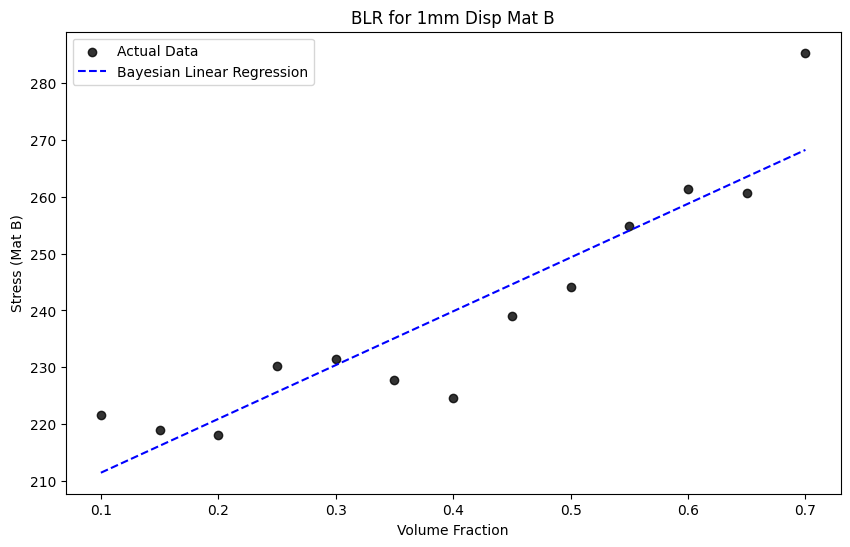

Processing Load Case: 5mm Disp


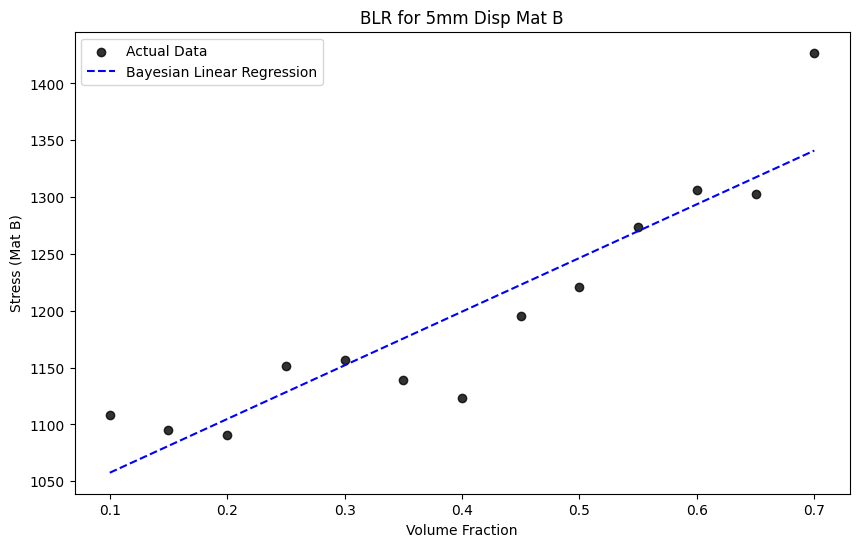

Processing Load Case: 100N Load


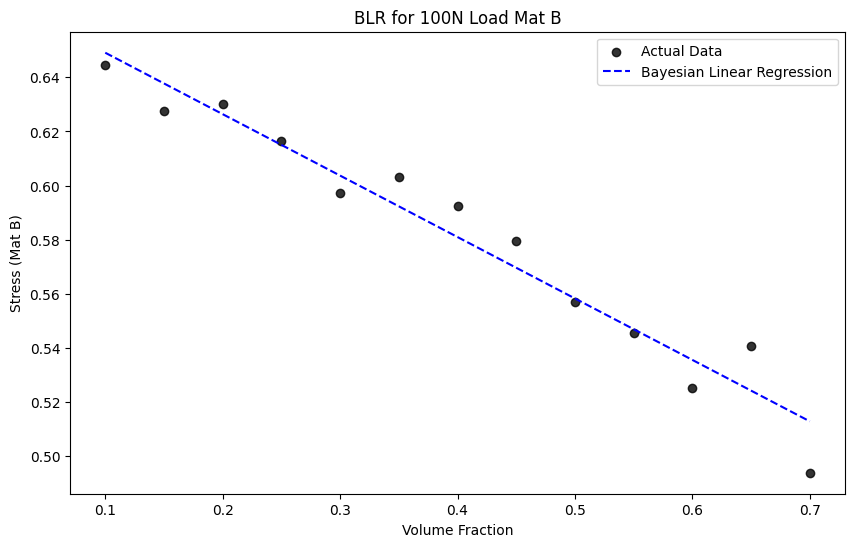

Processing Load Case: 500N Load


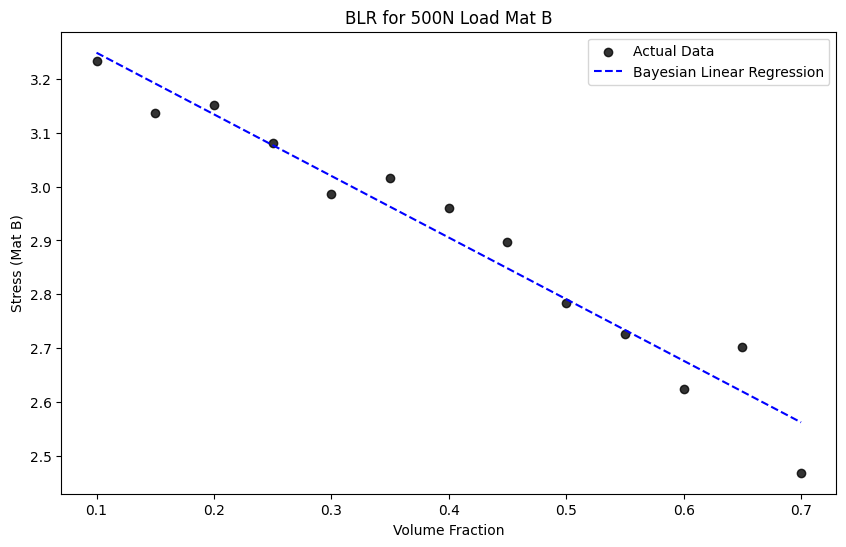

In [15]:
# Loop through each sheet (load case)
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat B"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat B"].values  # Selecting Mat B as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # BLR
    blr = BayesianRidge()
    blr.fit(X_scaled, y)
    y_pred_blr = blr.predict(X_scaled)

    plt.figure(figsize=(10, 6))

    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Bayesian Linear Regression Line
    plt.plot(X, y_pred_blr, color='blue', label="Bayesian Linear Regression", linestyle='dashed')



    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat B)")
    plt.title(f"BLR for {sheet_name} Mat B")
    plt.legend()
    plt.show()

Gaussian For Mat B

Processing Load Case: 1mm Disp


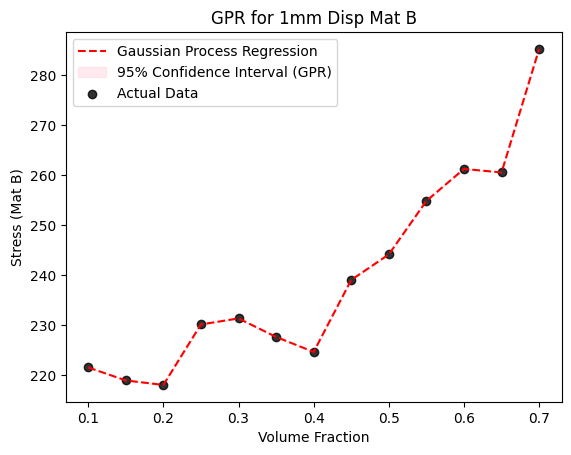

Optimized Kernel for GPR (1mm Disp): 167**2 * RBF(length_scale=0.439)
Processing Load Case: 5mm Disp


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


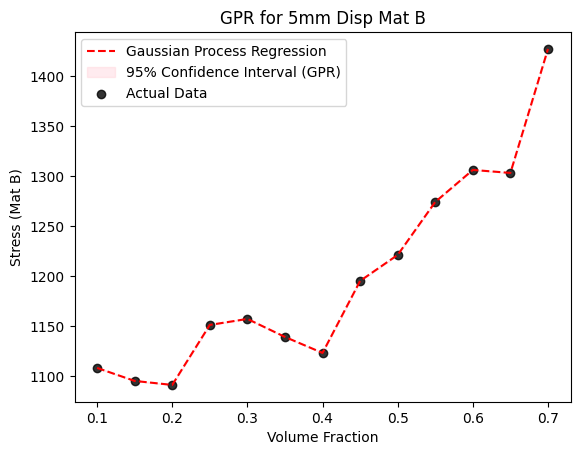

Optimized Kernel for GPR (5mm Disp): 1.2e+03**2 * RBF(length_scale=0.0411)
Processing Load Case: 100N Load


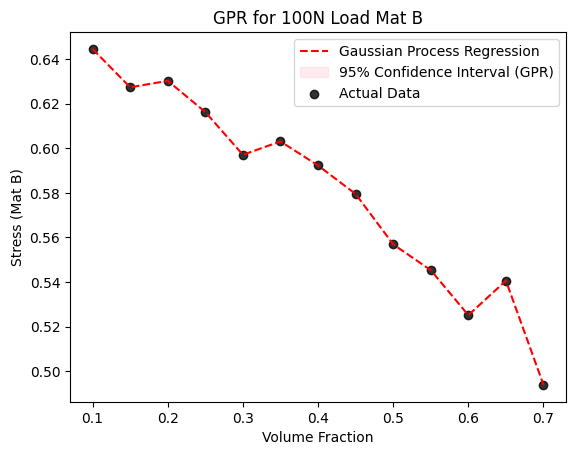

Optimized Kernel for GPR (100N Load): 0.393**2 * RBF(length_scale=0.442)
Processing Load Case: 500N Load


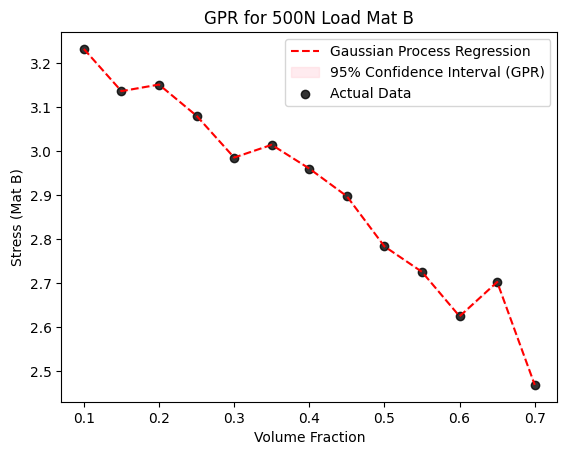

Optimized Kernel for GPR (500N Load): 1.97**2 * RBF(length_scale=0.442)


In [28]:
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat B"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat B"].values  # Selecting Mat B as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # GPR
    kernel = C(1.0, (1e-3, 1e7)) * RBF(1.0, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X_scaled, y)
    y_pred_gpr, y_std = gpr.predict(X_scaled, return_std=True)  # Get mean and std deviation
    # Gaussian Process Mean Prediction
    plt.plot(X, y_pred_gpr, color='red', label="Gaussian Process Regression", linestyle='dashed')
     # Uncertainty Bounds (GPR)
    plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * y_std, y_pred_gpr + 1.96 * y_std,
                     color='pink', alpha=0.3, label="95% Confidence Interval (GPR)")
    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat B)")
    plt.title(f"GPR for {sheet_name} Mat B")
    plt.legend()
    plt.show()
    # Print Kernel after Optimization
    print(f"Optimized Kernel for GPR ({sheet_name}):", gpr.kernel_)